In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
COLORS = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#D55E00", "#CC79A7", "#56B4E9", "#009E73", "#F0E442", "#0072B2"]
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=COLORS)

### Golden Section Search

In [2]:
def goldenSectionSearch(objective, 
                        interval, 
                        tolerance, 
                        maxima=True, 
                        max_iterations=10000):
    """
    Implementation for the Golden Section Search Algorithm
    which works for unimodal functions i.e. the functions that
    contain only one local maxima or minima in the given interval

    Parameters
    ----------
    objective : function
        The objective function for which the minimum/maxima is to be found
    interval : tuple
        The interval in which the function is to be searched for the
        minimum/maxima i.e. (low, high)
    tolerance : float
        The tolerance is for the terminating condition of the algorithm
        i.e. the algorithm will terminate when the length of the interval
        is less than the tolerance
    maxima : bool
        If True, the algorithm will search for the maximum else it will 
        search for the minimum
    max_iterations : int
        The maximum number of iterations for the algorithm
        
    Returns
    -------
    optima : float
        The point at which the optimum value is found
    optimum : float
        The optimum value of the function at the optimum point
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting. 
    """

    cache = None
    widths_cache = []
    optimas_cache = []

    PHI = (3 - np.sqrt(5)) / 2 # Constant for the algorithm
    low, high = interval       # Unpacking the interval

    # Determining the initial points for the algorithm
    x1 = low + (high - low) * PHI
    x2 = high - (high - low) * PHI

    # If the algorithm is to find the minima, then we will negate the function
    # and find the maxima instead and then negate the result
    if not maxima:
        current_objective = lambda x: -objective(x) 
    else:
        current_objective = objective

    itr_count = 0
    while (high - low) > tolerance and itr_count < max_iterations:
        # If the value of the function at x1 is greater than the value of the
        # function at x2, then the optimum (maxium here) point lies in the interval (x1, high)
        # else it lies in the interval (low, x2)
        
        if current_objective(x1) > current_objective(x2):
            high = x2
        else:
            low = x1

        x1 = low + (high - low) * PHI
        x2 = x1 + (high - x1) * PHI
        
        widths_cache.append(high - low)
        optimas_cache.append((low + high) / 2)
        itr_count += 1
    
    # Calculating the optimum point and the optimum value
    optima = (low + high) / 2
    optimum = objective(optima)
    
    # Returning the optimum point, optimum value and the cache
    cache = (widths_cache, optimas_cache)
    return optima, optimum, cache

### Bisection Search Algorithms

In [3]:
def bisectionSearch(objective, 
                    derivative_objective, 
                    interval, 
                    tolerance, 
                    maxima=True, 
                    max_iterations=10000):
    """
    Implementation for the Bisection Search Algorithm which works for
    unimodal functions for finding the value maxima or minima of the function

    Parameters
    ----------
    objective : function
        The objective function for which the minimum/maxima is to be found
    derivative_objective : function
        The derivative of the objective function for which the minimum/maxima is to be found
    interval : tuple
        The interval in which the function is to be searched for the
        minimum/maxima i.e. (low, high)
    tolerance : float
        The tolerance is for the terminating condition of the algorithm
        i.e. the algorithm will terminate when the length of the interval
        is less than the tolerance
    maxima : bool
        If True, the algorithm will search for the maximum else it will 
        search for the minimum
    max_iterations : int
        The maximum number of iterations for the algorithm
        
    Returns
    -------
    optima : float
        The point at which the optimum value is found
    optimum : float
        The optimum value of the function at the optimum point
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting. 
    """

    cache = None
    widths_cache = []
    optimas_cache = []

    low, high = interval
    itr_count = 0
    optima = (low + high) / 2

    while itr_count < max_iterations and (high - low) > tolerance:
        mid = (low + high) / 2
        
        # Checking if the derivative of the objective function is positive or negative
        # at the mid point and then updating the interval accordingly
        if np.sign(derivative_objective(mid)) == np.sign(derivative_objective(low)):
            low = mid
        else:
            high = mid

        widths_cache.append(high - low)
        optimas_cache.append((low + high) / 2)
        itr_count += 1
    
    # Calculating the optimum point and the optimum value
    optima = (low + high) / 2
    optimum = objective(optima)
    
    # Returning the optimum point, optimum value and the cache
    cache = (widths_cache, optimas_cache)
    return optima, optimum, cache

### Newton's Method

In [4]:
def newtonMethod(objective, 
                  derivative_objective, 
                  double_derivative_objective,
                  tolerance,
                  interval=None,
                  max_patience=5,
                  max_iterations=10000):
    """
    Implementation for the Newton Raphson Algorithm which works for
    unimodal functions for finding the value maxima or minima of the function

    Parameters
    ----------
    objective : function
        The objective function for which the minimum/maxima is to be found
    derivative_objective : function
        The derivative of the objective function for which the minimum/maxima is to be found
    double_derivative_objective : function
        The double derivative of the objective function for which the minimum/maxima is to be found
    tolerance : float
        The tolerance is for the terminating condition of the algorithm
    interval : tuple
        The interval in which the function lies, if the interval is not given then the algorithm
        will consider it to be (-inf, inf)
    max_patience : int
        The maximum number of iterations for which the algorithm can be stuck in the corner of the interval
    max_iterations : int
        The maximum number of iterations for the algorithm
        
    Returns
    -------
    optima : float
        The point at which the optimum value is found
    optimum : float
        The optimum value of the function at the optimum point
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting. 
    """

    cache = None
    optimas_cache = []
    derivative_cache = []

    low, high = interval

    # # If the interval is not given, then we will consider it to be (-inf, inf)
    if interval is None:
        interval = (-np.inf, np.inf)
        x = np.random.randn()
    else:
        x = np.random.uniform(low, high)
    
    itr_count = 0
    patience = 0

    while itr_count < max_iterations and np.abs(derivative_objective(x)) > tolerance:
        optimas_cache.append(x)
        derivative_cache.append(derivative_objective(x))

        # Calculating the next point using the Newton Raphson update rule
        x = x - derivative_objective(x) / (double_derivative_objective(x) + 1e-8)
        
        # # Checking if the next point lies in the interval or not
        if x > high:
            x = high
            patience += 1
        elif x < low:
            x = low
            patience += 1
        else:
            patience = 0

        # # If the algorithm is stuck in a loop, then we will break out of the loop
        if patience > max_patience:
            break

        itr_count += 1
    
    optimas_cache.append(x)
    derivative_cache.append(derivative_objective(x))
    
    # Calculating the optimum point and the optimum value
    optima = x
    optimum = objective(optima)

    # Returning the optimum point, optimum value and the cache
    cache = (optimas_cache, derivative_cache)
    return optima, optimum, cache

The idea of patience is copied from Projected Gradient Descent which says that whenever the iterate goes out of the set, then we project it back into the set. Here, whenever the iterate $x$ would be less that $\mathrm{low}$ then it will get projected to $\mathrm{low}$ and similar for the other side.

In [5]:
class ConvexFunctionSquare(object):
    """
    Class for representing the convex function 
    (x - 1)^2 + 2
    """

    def __init__(self):
        self.name = r"$x^4 + x^2 + 2$"
        self.interval = (-50, 50)
        self.optima = 0
        self.optimum = self.mainFunction(self.optima)
    
    def mainFunction(self, x):
        return x ** 4 + (x) ** 2 + 2
    
    def derivative(self, x):
        return 4 * (x ** 3) + 2 * (x)
    
    def double_derivative(self, x):
        return 12 * (x ** 2) + 2

### Plotting and Visualization

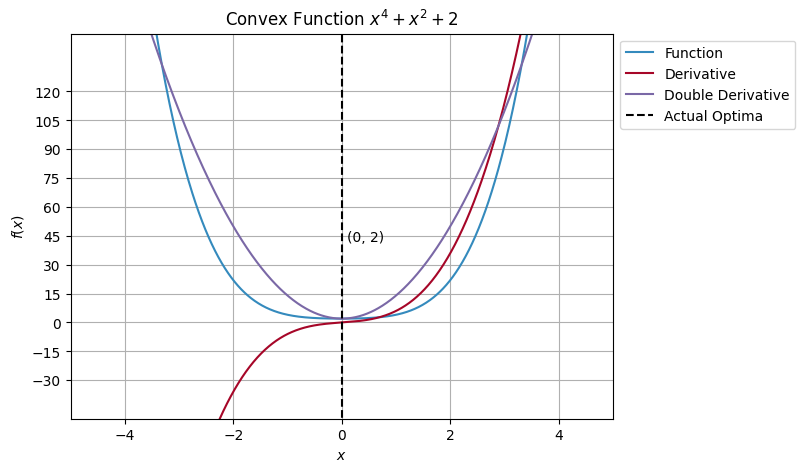

In [6]:
convex_func_square = ConvexFunctionSquare()
x = np.linspace(*convex_func_square.interval, 10000)
functional_value = convex_func_square.mainFunction(x)
derivative_value = convex_func_square.derivative(x)
double_derivative_value = convex_func_square.double_derivative(x)

plt.figure(figsize=(7, 5))
plt.plot(x, functional_value, label='Function')
plt.plot(x, derivative_value, label='Derivative')
plt.plot(x, double_derivative_value, label='Double Derivative')
plt.vlines(convex_func_square.optima, -100, 200, linestyles='dashed', label='Actual Optima', colors='black')
plt.text(convex_func_square.optima + 0.1, convex_func_square.optimum + 40, f"({round(convex_func_square.optima,3)}, {round(convex_func_square.optimum,3)})", fontsize=10)

plt.title(f"Convex Function {convex_func_square.name}")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-30, 125, 15))
plt.xlim(-5, 5)
plt.ylim(-50, 150)

plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

In [7]:
golden_optima, golden_optimum, cache = goldenSectionSearch(convex_func_square.mainFunction, convex_func_square.interval, 1e-2, maxima=False)
widths_cache, optimas_cache = cache
print(f"Golden Section Search for {convex_func_square.name}")
print(f"Obtained Optimum Point: {round(golden_optima, 7)}| Actual Optimum Point: {round(convex_func_square.optima, 7)}| Error: {round(np.abs(golden_optima - convex_func_square.optima), 7)}")
print(f"Obtained Optimum Value: {round(golden_optimum, 7)}| Actual Optimum Value: {round(convex_func_square.optimum, 7)}| Error: {round(np.abs(golden_optimum - convex_func_square.optimum), 7)}")

Golden Section Search for $x^4 + x^2 + 2$
Obtained Optimum Point: 0.0012625| Actual Optimum Point: 0| Error: 0.0012625
Obtained Optimum Value: 2.0000016| Actual Optimum Value: 2| Error: 1.6e-06


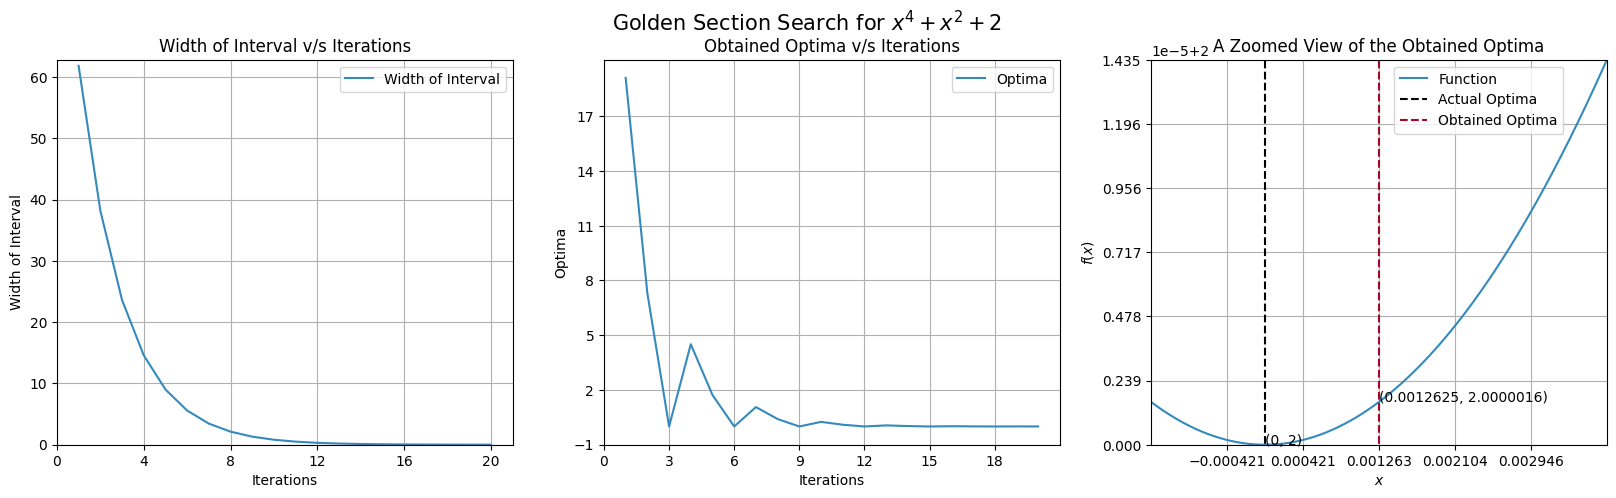

In [8]:
iterations = np.arange(1, len(widths_cache) + 1)
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
plt.plot(iterations, widths_cache, label='Width of Interval')
plt.title(r"Width of Interval v/s Iterations")
plt.xlabel(r"Iterations")
plt.ylabel(r"Width of Interval")
plt.xticks(np.arange(0, len(widths_cache) + 1, 4))
plt.yticks(np.arange(0, max(widths_cache) + 1, 10))
plt.xlim(0, len(widths_cache) + 1)
plt.ylim(0, max(widths_cache) + 1)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1))

plt.subplot(1,3,2)
plt.plot(iterations, optimas_cache, label='Optima')
plt.title(r"Obtained Optima v/s Iterations")
plt.xlabel(r"Iterations")
plt.ylabel(r"Optima")
plt.xticks(np.arange(0, len(optimas_cache) + 1, 3))
plt.yticks(np.arange(round(min(optimas_cache)) - 1, round(max(optimas_cache)) + 1, 3))
plt.xlim(0, len(optimas_cache) + 1)
plt.ylim(min(optimas_cache) - 1, max(optimas_cache) + 1)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1))

plt.subplot(1,3,3)
error = np.abs(golden_optima - convex_func_square.optima)
interval = (golden_optima - 2 * error, golden_optima + 2 * error)
x = np.linspace(*interval, 1000)
functional_value = convex_func_square.mainFunction(x)

plt.plot(x, functional_value, label='Function')
plt.vlines(convex_func_square.optima, -40, 130, linestyles='dashed', label='Actual Optima', colors='black')
plt.vlines(golden_optima, -40, 130, linestyles='dashed', label='Obtained Optima', colors=COLORS[1])
plt.text(convex_func_square.optima, convex_func_square.optimum, f"({round(convex_func_square.optima, 3)}, {round(convex_func_square.optimum, 3)})", fontsize=10)
plt.text(golden_optima, golden_optimum, f"({round(golden_optima, 7)}, {round(golden_optimum, 7)})", fontsize=10)

plt.title(r"A Zoomed View of the Obtained Optima")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.xticks(np.round(np.linspace(*interval, 7),6))
plt.yticks(np.linspace(min(functional_value), max(functional_value), 7))
plt.xlim(*interval)
plt.ylim(functional_value.min(), functional_value.max())
plt.grid()
plt.legend(bbox_to_anchor=(0.92, 1))

plt.suptitle(f"Golden Section Search for {convex_func_square.name}", fontsize=15)
plt.show()

In [9]:
bisection_optima, bisection_optimum, cache = bisectionSearch(convex_func_square.mainFunction, convex_func_square.derivative, convex_func_square.interval, 1e-2)
widths_cache, optimas_cache = cache
print(f"Bisection Section Search for {convex_func_square.name}")
print(f"Obtained Optimum Point: {round(bisection_optima, 7)}| Actual Optimum Point: {round(convex_func_square.optima, 7)}")
print(f"Obtained Optimum Value: {round(bisection_optimum, 7)}| Actual Optimum Value: {round(convex_func_square.optimum, 7)}")

Bisection Section Search for $x^4 + x^2 + 2$
Obtained Optimum Point: -0.0030518| Actual Optimum Point: 0
Obtained Optimum Value: 2.0000093| Actual Optimum Value: 2


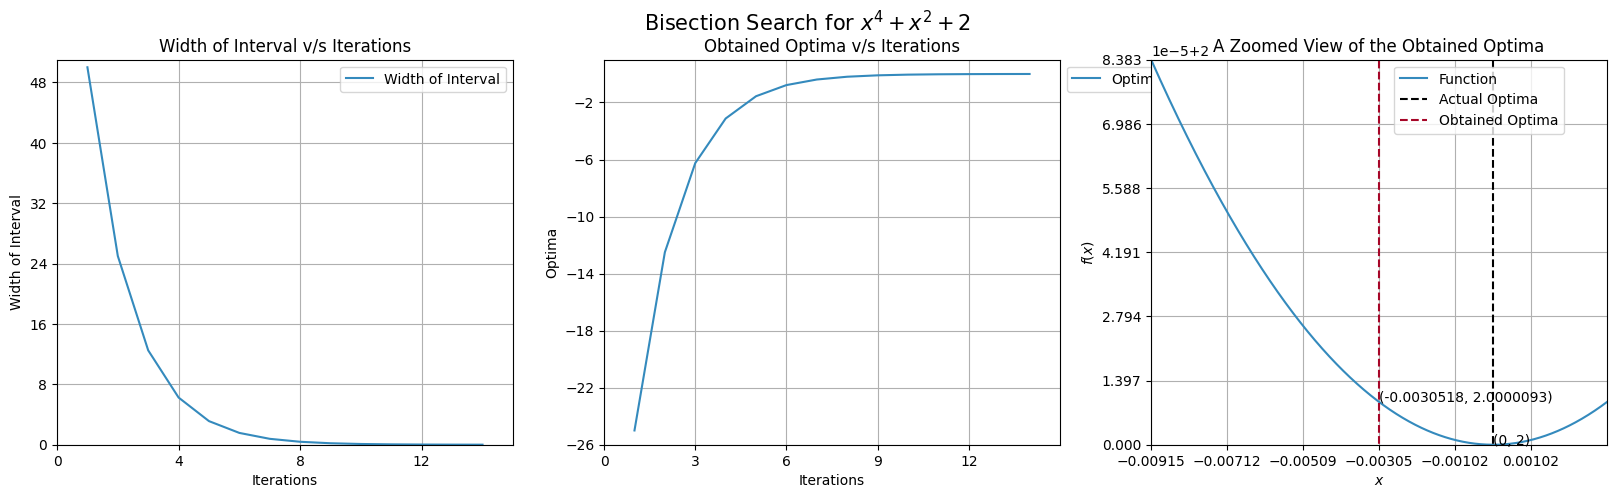

In [10]:
iterations = np.arange(1, len(widths_cache) + 1)
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
plt.plot(iterations, widths_cache, label='Width of Interval')
plt.title(r"Width of Interval v/s Iterations")
plt.xlabel(r"Iterations")
plt.ylabel(r"Width of Interval")
plt.xticks(np.arange(0, len(widths_cache) + 1, 4))
plt.yticks(np.arange(0, max(widths_cache) + 1, 8))
plt.xlim(0, len(widths_cache) + 1)
plt.ylim(0, max(widths_cache) + 1)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1))

plt.subplot(1,3,2)
plt.plot(iterations, optimas_cache, label='Optima')
plt.title(r"Obtained Optima v/s Iterations")
plt.xlabel(r"Iterations")
plt.ylabel(r"Optima")
plt.xticks(np.arange(0, len(optimas_cache) + 1, 3))
plt.yticks(np.arange(round(min(optimas_cache)) - 1, round(max(optimas_cache)) + 1, 4))
plt.xlim(0, len(optimas_cache) + 1)
plt.ylim(min(optimas_cache) - 1, max(optimas_cache) + 1)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1))

plt.subplot(1,3,3)
error = np.abs(bisection_optima - convex_func_square.optima)
interval = (bisection_optima - 2 * error, bisection_optima + 2 * error)
x = np.linspace(*interval, 1000)
functional_value = convex_func_square.mainFunction(x)

plt.plot(x, functional_value, label='Function')
plt.vlines(convex_func_square.optima, -40, 130, linestyles='dashed', label='Actual Optima', colors='black')
plt.vlines(bisection_optima, -40, 130, linestyles='dashed', label='Obtained Optima', colors=COLORS[1])
plt.text(convex_func_square.optima, convex_func_square.optimum, f"({round(convex_func_square.optima, 3)}, {round(convex_func_square.optimum, 3)})", fontsize=10)
plt.text(bisection_optima, bisection_optimum, f"({round(bisection_optima, 7)}, {round(bisection_optimum, 7)})", fontsize=10)

plt.title(r"A Zoomed View of the Obtained Optima")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.xticks(np.round(np.linspace(*interval, 7),6))
plt.yticks(np.linspace(min(functional_value), max(functional_value), 7))
plt.xlim(*interval)
plt.ylim(functional_value.min(), functional_value.max())
plt.grid()
plt.legend(bbox_to_anchor=(0.92, 1))

plt.suptitle(f"Bisection Search for {convex_func_square.name}", fontsize=15)
plt.show()

In [11]:
newton_optima, newton_optimum, cache = newtonMethod(convex_func_square.mainFunction, convex_func_square.derivative, convex_func_square.double_derivative, 1e-2, convex_func_square.interval)
optimas_cache, derivative_cache = cache
print(f"Newton's Method for {convex_func_square.name}")
print(f"Obtained Optimum Point: {round(bisection_optima, 7)}| Actual Optimum Point: {round(convex_func_square.optima, 7)}| Error: {round(np.abs(bisection_optima - convex_func_square.optima), 7)}")
print(f"Obtained Optimum Value: {round(bisection_optimum, 7)}| Actual Optimum Value: {round(convex_func_square.optimum, 7)}| Error: {round(np.abs(bisection_optimum - convex_func_square.optimum), 7)}")

Newton's Method for $x^4 + x^2 + 2$
Obtained Optimum Point: -0.0030518| Actual Optimum Point: 0| Error: 0.0030518
Obtained Optimum Value: 2.0000093| Actual Optimum Value: 2| Error: 9.3e-06


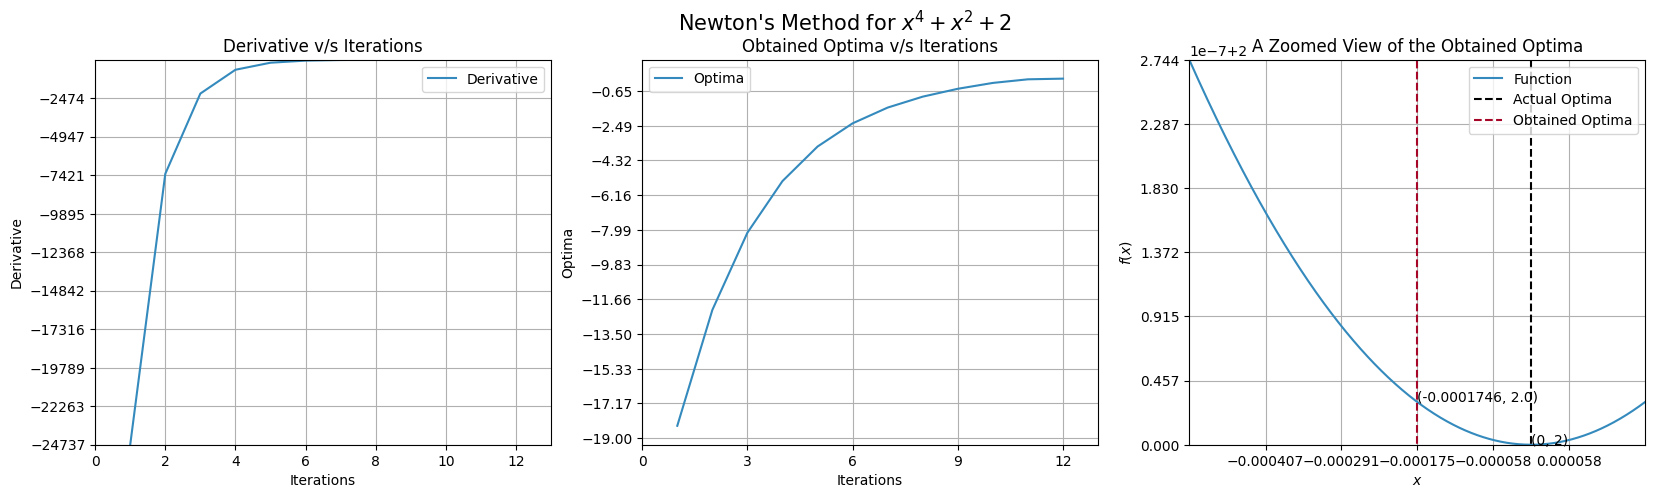

In [12]:
iterations = np.arange(1, len(optimas_cache) + 1)

plt.figure(figsize=(20, 5))

derivative_min_value, derivative_max_value = min(derivative_cache), max(derivative_cache)
optima_min_value, optima_max_value = min(optimas_cache), max(optimas_cache)

plt.subplot(1,3,1)
plt.plot(iterations, derivative_cache, label='Derivative')
plt.title(r"Derivative v/s Iterations")
plt.xlabel(r"Iterations")
plt.ylabel(r"Derivative")
plt.xticks(np.arange(0, len(optimas_cache) + 1, 2))
plt.yticks(np.arange(derivative_min_value, derivative_max_value, (derivative_max_value - derivative_min_value) / 10))
plt.xlim(0, len(optimas_cache) + 1)
plt.ylim(derivative_min_value, derivative_max_value)
plt.grid()
plt.legend()

plt.subplot(1,3,2)
plt.plot(iterations, optimas_cache, label='Optima')
plt.title(r"Obtained Optima v/s Iterations")
plt.xlabel(r"Iterations")
plt.ylabel(r"Optima")
plt.xticks(np.arange(0, len(optimas_cache) + 1, 3))
plt.yticks(np.arange(round(min(optimas_cache)) - 1, round(max(optimas_cache)) + 1, (optima_max_value - optima_min_value) / 10))
plt.xlim(0, len(optimas_cache) + 1)
plt.ylim(min(optimas_cache) - 1, max(optimas_cache) + 1)
plt.grid()
plt.legend()

plt.subplot(1,3,3)
error = np.abs(newton_optima - convex_func_square.optima)
interval = (newton_optima - 2 * error, newton_optima + 2 * error)
x = np.linspace(*interval, 1000)
functional_value = convex_func_square.mainFunction(x)

plt.plot(x, functional_value, label='Function')
plt.vlines(convex_func_square.optima, -40, 130, linestyles='dashed', label='Actual Optima', colors='black')
plt.vlines(newton_optima, -40, 130, linestyles='dashed', label='Obtained Optima', colors=COLORS[1])
plt.text(convex_func_square.optima, convex_func_square.optimum, f"({round(convex_func_square.optima, 3)}, {round(convex_func_square.optimum, 3)})", fontsize=10)
plt.text(newton_optima, newton_optimum, f"({round(newton_optima, 7)}, {round(newton_optimum, 7)})", fontsize=10)

plt.title(r"A Zoomed View of the Obtained Optima")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.xticks(np.round(np.linspace(*interval, 7), 6))
plt.yticks(np.linspace(min(functional_value), max(functional_value), 7))
plt.xlim(*interval)
plt.ylim(functional_value.min(), functional_value.max())
plt.grid()
plt.legend()

plt.suptitle(f"Newton\'s Method for {convex_func_square.name}", fontsize=15)
plt.show()

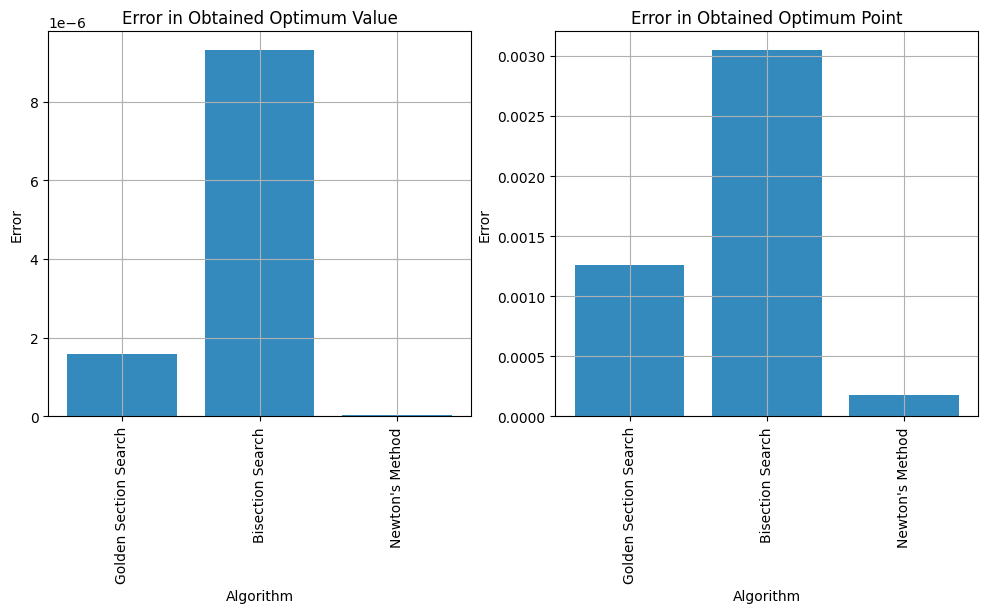

In [13]:
# Comparing the three algorithms
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
actual_optimum = convex_func_square.optimum
plt.bar(['Golden Section Search', 'Bisection Search', 'Newton\'s Method'], [np.abs(golden_optimum - actual_optimum), np.abs(bisection_optimum - actual_optimum), np.abs(newton_optimum - actual_optimum)])
plt.title(r"Error in Obtained Optimum Value")
plt.xlabel(r"Algorithm")
plt.ylabel(r"Error")
plt.xticks(rotation=90)
plt.grid()

plt.subplot(1,2,2)
actual_optima = convex_func_square.optima
plt.bar(['Golden Section Search', 'Bisection Search', 'Newton\'s Method'], [np.abs(golden_optima - actual_optima), np.abs(bisection_optima - actual_optima), np.abs(newton_optima - actual_optima)])
plt.title(r"Error in Obtained Optimum Point")
plt.xlabel(r"Algorithm")
plt.ylabel(r"Error")
plt.xticks(rotation=90)
plt.grid()

plt.show()